In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_src = cv2.imread("undistorted_fisheye.png")       
img_dst = cv2.imread("ohlf.png")   
scale = 0.3  
display_src = cv2.resize(img_src, (0, 0), fx=scale, fy=scale)
display_dst = img_dst.copy()


In [111]:

src_points_scaled = []  
dst_points = []       

def click_src(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        src_points_scaled.append((x, y))
        cv2.circle(display_src, (x, y), 5, (0, 0, 255), -1)
        cv2.imshow("Source (Scaled)", display_src)
        print(f"[SRC scaled] ({x}, {y})")

def click_dst(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        dst_points.append((x, y))
        cv2.circle(display_dst, (x, y), 5, (255, 0, 0), -1)
        cv2.imshow("Destination", display_dst)
        print(f"[DST] ({x}, {y})")

cv2.imshow("Source (Scaled)", display_src)
cv2.setMouseCallback("Source (Scaled)", click_src)
cv2.waitKey(0)
cv2.destroyWindow("Source (Scaled)")

cv2.imshow("Destination", display_dst)
cv2.setMouseCallback("Destination", click_dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


[SRC scaled] (516, 459)
[SRC scaled] (501, 452)
[SRC scaled] (547, 347)
[SRC scaled] (473, 300)
[SRC scaled] (409, 337)
[SRC scaled] (401, 348)
[SRC scaled] (373, 376)
[SRC scaled] (352, 418)
[SRC scaled] (335, 473)
[SRC scaled] (254, 616)
[SRC scaled] (325, 582)
[SRC scaled] (308, 617)
[SRC scaled] (318, 633)
[SRC scaled] (370, 657)
[SRC scaled] (421, 668)
[SRC scaled] (455, 625)
[SRC scaled] (486, 541)
[DST] (1305, 579)
[DST] (1306, 593)
[DST] (1211, 594)
[DST] (1210, 686)
[DST] (1259, 721)
[DST] (1271, 724)
[DST] (1297, 731)
[DST] (1327, 730)
[DST] (1366, 723)
[DST] (1464, 723)
[DST] (1425, 686)
[DST] (1450, 689)
[DST] (1448, 670)
[DST] (1455, 622)
[DST] (1450, 573)
[DST] (1425, 578)
[DST] (1373, 578)


In [126]:

src_points = np.array([[x / scale, y / scale] for (x, y) in src_points_scaled], dtype=np.float32)
dst_points = np.array(dst_points, dtype=np.float32)


print("Source (original):", src_points)
print("Destination:", dst_points)

h, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC)
print("\nHomography Matrix:\n", h)

Source (original): [[1720.     1530.    ]
 [1670.     1506.6666]
 [1823.3334 1156.6666]
 [1576.6666 1000.    ]
 [1363.3334 1123.3334]
 [1336.6666 1160.    ]
 [1243.3334 1253.3334]
 [1173.3334 1393.3334]
 [1116.6666 1576.6666]
 [ 846.6667 2053.3333]
 [1083.3334 1940.    ]
 [1026.6666 2056.6667]
 [1060.     2110.    ]
 [1233.3334 2190.    ]
 [1403.3334 2226.6667]
 [1516.6666 2083.3333]
 [1620.     1803.3334]]
Destination: [[1305.  579.]
 [1306.  593.]
 [1211.  594.]
 [1210.  686.]
 [1259.  721.]
 [1271.  724.]
 [1297.  731.]
 [1327.  730.]
 [1366.  723.]
 [1464.  723.]
 [1425.  686.]
 [1450.  689.]
 [1448.  670.]
 [1455.  622.]
 [1450.  573.]
 [1425.  578.]
 [1373.  578.]]

Homography Matrix:
 [[-3.80508158e-01  2.30400538e-01  1.20383711e+03]
 [-3.44393073e-01 -5.12837286e-02  1.06783855e+03]
 [-2.39590097e-04  6.73004069e-05  1.00000000e+00]]


In [113]:
np.save("Homography for 229_camera_.npy", h)

In [114]:
h = np.load("Homography for 229_camera_.npy")

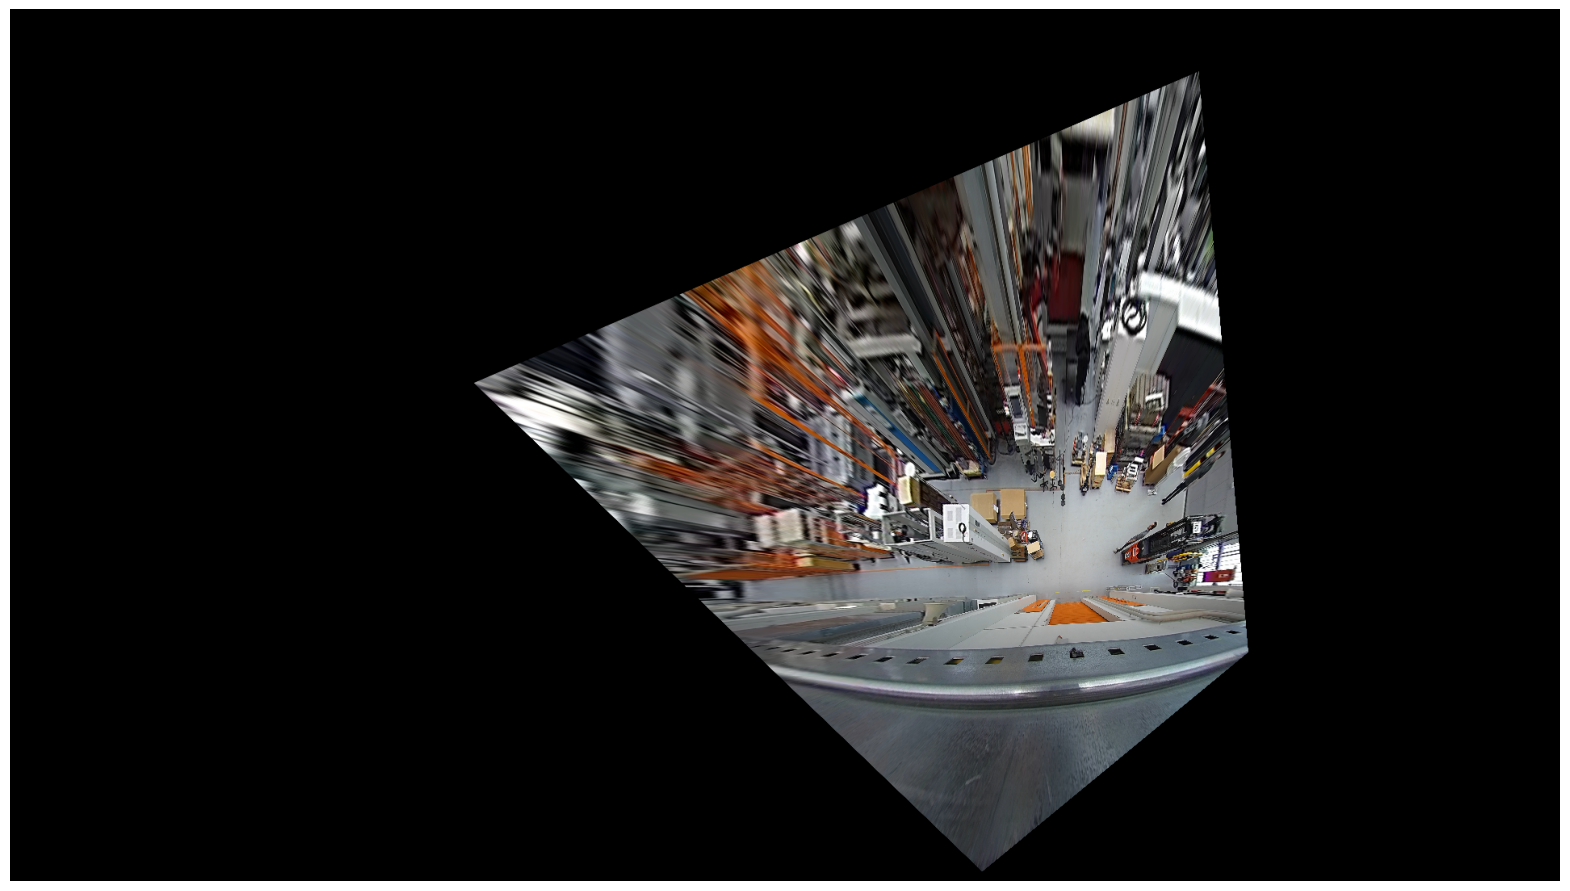

In [ ]:

wraped = cv2.warpPerspective(img_src, h, (img_dst.shape[1], img_dst.shape[0]))
wraped_rgb = cv2.cvtColor(wraped, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,12))
plt.imshow(wraped_rgb)
plt.axis("off")
plt.show()




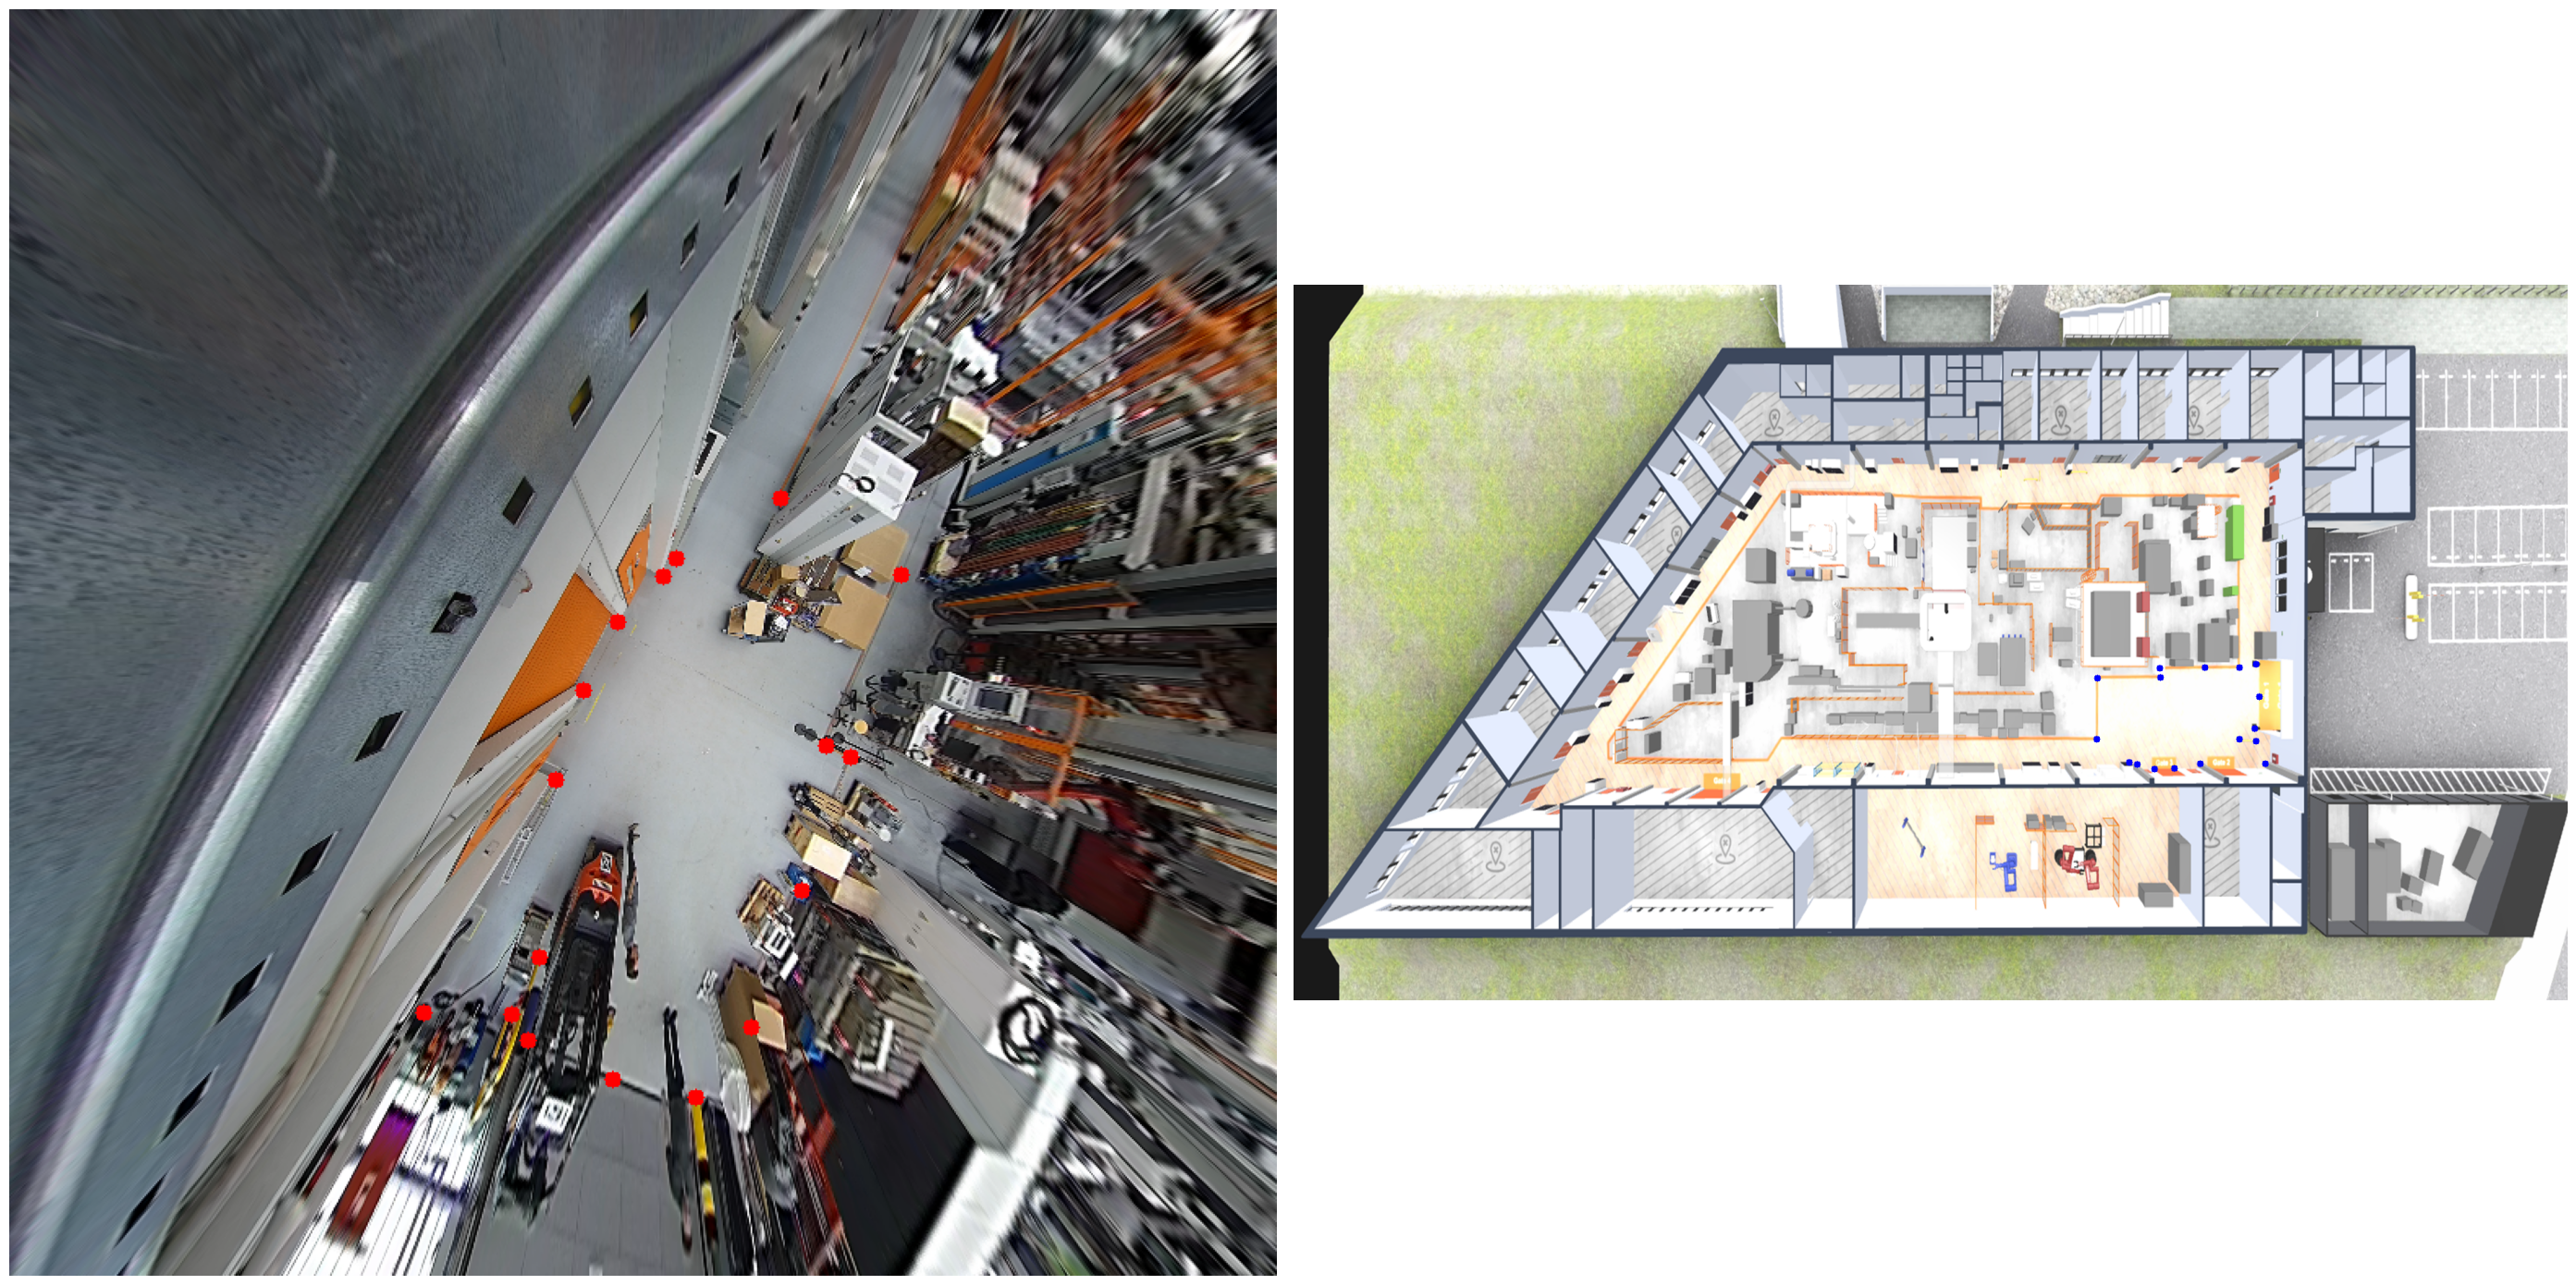

In [116]:

plt.figure(figsize=(28,14))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(display_src,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(display_dst,cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()

In [125]:

scale = 0.3
dis_src = cv2.resize(img_src, (0, 0), fx=scale, fy=scale)

src_base = dis_src.copy()
dst_base = img_dst.copy()
src_vis = src_base.copy()
dst_vis = dst_base.copy()


def click_source(event, x, y, flags, param):

    if event == cv2.EVENT_LBUTTONDOWN:
        src_vis = src_base.copy()
        dst_vis = dst_base.copy()

        x_orig, y_orig = x / scale, y / scale
        src_pt = np.array([[[x_orig, y_orig]]], dtype=np.float32)
        mapped_pt = cv2.perspectiveTransform(src_pt, h)
        mx, my = int(mapped_pt[0][0][0]), int(mapped_pt[0][0][1])

        cv2.circle(src_vis, (x, y), 3, (0, 255, 0), -1)
        cv2.putText(src_vis, f"({int(x_orig)}, {int(y_orig)})",
                    (x + 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

        cv2.circle(dst_vis, (mx, my), 3, (0, 0, 255), -1)
        cv2.putText(dst_vis, f"({mx}, {my})",
                    (mx + 10, my - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

        cv2.imshow("Source Image (click here)", src_vis)
        cv2.imshow("Destination Image (mapped points)", dst_vis)



cv2.imshow("Source Image (click here)", src_vis)
cv2.imshow("Destination Image (mapped points)", dst_vis)
cv2.setMouseCallback("Source Image (click here)", click_source)


while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  
        break

cv2.destroyAllWindows()
